In [119]:
import pandas as pd

#path = "./results/BETA/Balance Scale_result.csv"
path = "./results/LGBM/cmc_result.csv"



In [120]:
import pandas as pd
data_df = pd.read_csv(path)

acc_df = data_df[data_df['Metric'] == 'ACC']
mae_df = data_df[data_df['Metric'] == 'MAE']
mse_df = data_df[data_df['Metric'] == 'MSE']



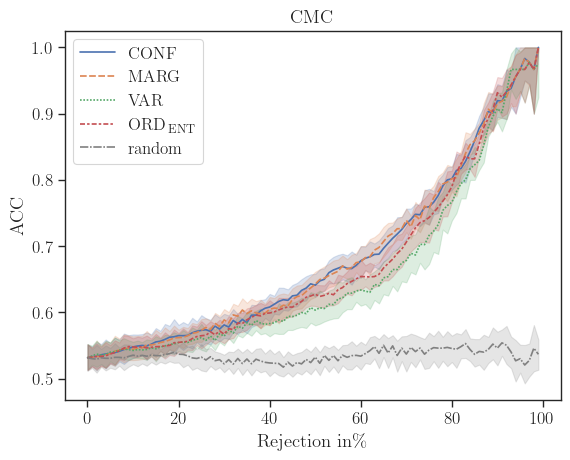

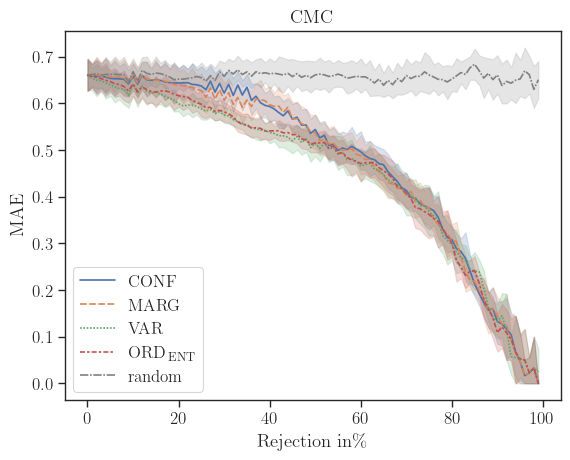

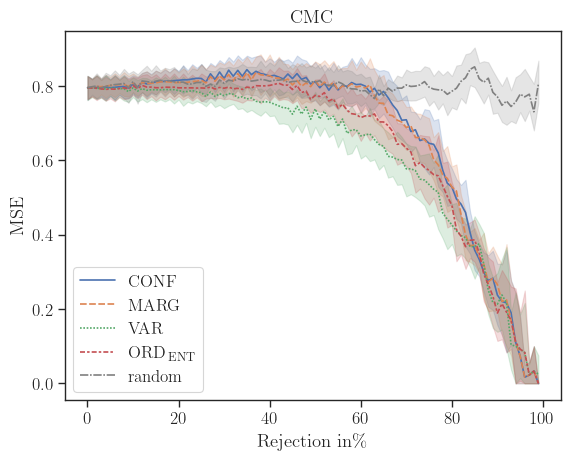

In [121]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style='ticks', font_scale=1.4, font="serif", rc={
    "text.usetex": True,
     'text.latex.preamble': r'\usepackage{amsmath}'
})


def plot(df, ylabel, title):


    df.loc[df['Measure'] == 'random', 'Performance'] = df[df['Measure'] == 'random']['Performance'].clip(df[df['Measure'] == 'random']['Performance'].quantile(0.1), df[df['Measure'] == 'random']['Performance'].quantile(0.9))

    
    #df = df[df['Measure'] != 'CONF']
    #df = df[df['Measure'] != 'MARG']
    df = df[df['Measure'] != 'ENT']
    #df = df[df['Measure'] != 'VAR']
    df = df[df['Measure'] != "$\\text{CONS}_{\\,\\text{Cns}}$"]
    df = df[df['Measure'] != "$\\text{CONS}_{\\,C_1}$"]
    df = df[df['Measure'] != "$\\text{CONS}_{\\,C_2}$"]
    df = df[df['Measure'] !=  "$\\text{CONS}_{\\,C_A}$"]
    #df = df[df['Measure'] !=  "$\\text{ORD}_{\\,\\text{ENT}}$"]
    df = df[df['Measure'] != "$\\text{ORD}_{\\,\\text{MARG}}$"]
    df = df[df['Measure'] != "$\\text{ORD}_{\\,\\text{VAR}}$"]
    df = df[df['Measure'] != "$R_{l_1}$"]
    df = df[df['Measure'] != "$R_{l_2}$"]
    df = df[df['Measure'] != 'DFU']


    measures = df["Measure"].unique()
    colors = sns.color_palette()

    custom_palette = {"random": 'grey'}

    for i,measure in enumerate(measures):
        if measure != "random":
            custom_palette[measure] = colors[i]


    # Round
    df['Rejection'] = df['Rejection'].round(0)
    # Plot
    g = sns.lineplot(data=df, x="Rejection", y="Performance", hue="Measure", style="Measure",errorbar="ci",palette=custom_palette)
    g.set(xlabel='Rejection in\%', ylabel=ylabel, title=title)
    plt.gca().legend().set_title('')
    plt.savefig(f"{title}-{ylabel}.pdf", bbox_inches='tight',dpi=300)
    plt.show()


plot(acc_df, "ACC", "CMC")
plot(mae_df, "MAE", "CMC")
plot(mse_df, "MSE", "CMC")

